In [1]:
data_path = "./BaZrS3/"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thermopot import materials, calculations, reactions, potential, potentials

In [3]:
BaZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/BaZrS3_Pnma/hse06/aims.out")

BaS_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS_Fm-3m/hse06/aims.out")
BaS2_calc  = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS2_C2_c/hse06/aims.out")
BaS3_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P-421m/hse06/aims.out")
BaS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P2_12_12/hse06/aims.out")
Ba2S3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Ba2S3_I4_1md/hse06/aims.out")

ZrS_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_P4_nmm/hse06/aims.out")
ZrS_Fm_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_Fm-3m/hse06/aims.out")
ZrS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS3_P2_1m/hse06/aims.out")
ZrS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS2_P-3m1/hse06/aims.out")
Zr3S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Zr3S4_Fd-3m/hse06/aims.out")

Ba_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Ba_Im-3m/hse06/aims.out")
Zr_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Zr_P63_mmc/hse06/aims.out")
S_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S_P2_c/hse06/aims.out")

S2_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S2/hse06/aims.out",gas=True)
S8_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S8/hse06/aims.out",gas=True)

In [4]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},"../BaZrS3/phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)

BaS = materials.Solid("BaS", {"Ba":1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
BaS2 = materials.Solid("BaS2", {"Ba":1, "S": 2},"../BaZrS3/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
BaS3_P4 = materials.Solid("BaS3", {"Ba":1, "S": 3},"../BaZrS3/phonopy_output/BaS3_P-421m.dat",calculation=BaS3_P4_calc)
BaS3_P2 = materials.Solid("BaS3_P2", {"Ba":1, "S": 3},"../BaZrS3/phonopy_output/BaS3_P2_12_12.dat",calculation=BaS3_P2_calc)
Ba2S3 = materials.Solid("Ba2S3", {"Ba":2, "S": 3},"../BaZrS3/phonopy_output/Ba2S3_I4_1md.dat",calculation=Ba2S3_calc)

ZrS_P4 = materials.Solid("ZrS2",{"Zr": 1,"S": 1},"../BaZrS3/phonopy_output/ZrS_P4_nmm.dat",calculation=ZrS_P4_calc)
ZrS_Fm = materials.Solid("ZrS2",{"Zr": 1,"S": 1},"../BaZrS3/phonopy_output/ZrS_Fm-3m.dat",calculation=ZrS_Fm_calc)
ZrS3_P2 = materials.Solid("ZrS2",{"Zr": 1,"S": 3},"../BaZrS3/phonopy_output/ZrS3_P2_1m.dat",calculation=ZrS3_P2_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2},"../BaZrS3/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)
Zr3S4 = materials.Solid("ZrS2",{"Zr": 3,"S": 4},"../BaZrS3/phonopy_output/Zr3S4_Fd-3m.dat",calculation=Zr3S4_calc)

S8 = materials.IdealGas("S8",{'S':8},"../BaZrS3/nist_janaf/S8.dat",calculation=S8_calculation,zpe_lit=0.39)
S2 = materials.IdealGas("S2",{'S':2},"../BaZrS3/nist_janaf/S2.dat",calculation=S2_calculation,zpe_lit=0.047)

Ba = materials.Solid("Ba",{"Ba": 1},"../BaZrS3/phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},"../BaZrS3/phonopy_output/Zr_P63_mmc.dat",calculation=Zr_calc)
S =  materials.Solid("S",{"S":1},"../BaZrS3/phonopy_output/S_adam.dat",calculation=S_calc)

S_g = materials.Sulfur_model(S8_calculation.energy/8)  

In [5]:
T = np.linspace(400,1273,1000) # K
P = np.array( np.logspace(0,7,1000),ndmin=2).transpose() # Pa   valid region for sulfur mode

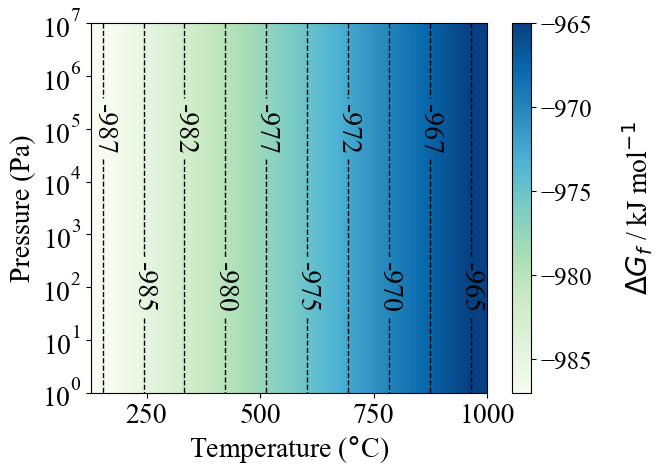

In [6]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=T,pressure=P)
GFE = bulk_reaction.Dmu(xc='hse06',units="kJ")
plt = GFE.plot_TvsP(scale_range=[-987,-965],T_units="C")
plt.minorticks_off()
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.savefig('elemental_reaction_hse06.png', bbox_inches = 'tight')

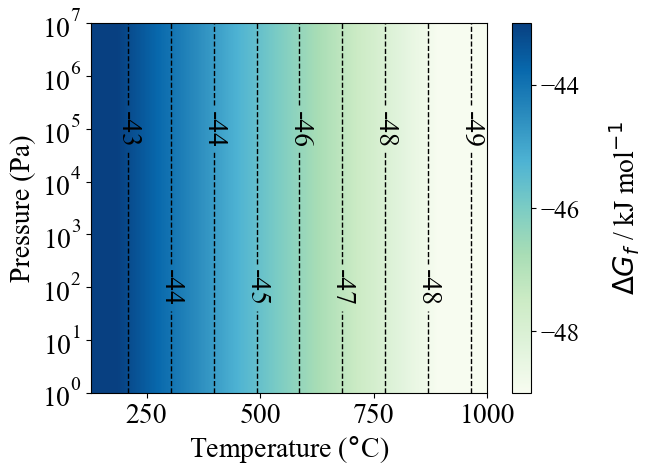

In [6]:
bulk_reaction = reactions.Reaction({BaS:1, ZrS2:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="hse06")
GFE.plot_TvsP(scale_range=[-49,-43],T_units="C")
plt.minorticks_off()
plt.xticks([250,500,750,1000])
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.savefig('BaS-ZrS2--BZS_hse06.png', bbox_inches = 'tight')

Text(0.5, 0, 'Temperature ($\\degree$C)')

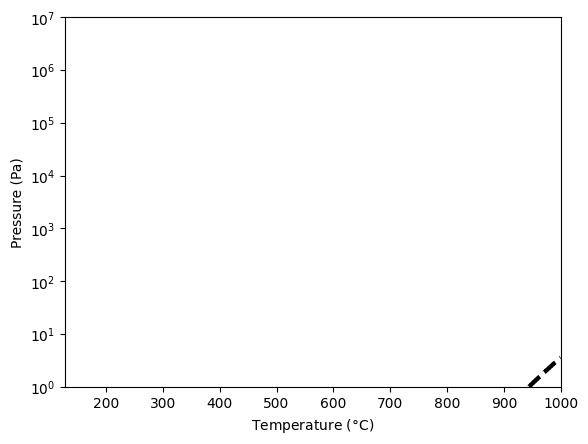

In [6]:
S2_formation = reactions.Reaction({},{S2:1},temperature=T,pressure=P)
S2_mu = S2_formation.Dmu(xc='hse06',units="kJ")

S8_formation = reactions.Reaction({},{S8:1},temperature=T,pressure=P)
S8_mu = S8_formation.Dmu(xc='hse06',units="kJ")


plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5],colors='k',linewidths=3,linestyles='dashed')
plt.yscale('log')
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.minorticks_off()
plt.ylabel('Pressure (Pa)')
plt.xlabel('Temperature ($\degree$C)')

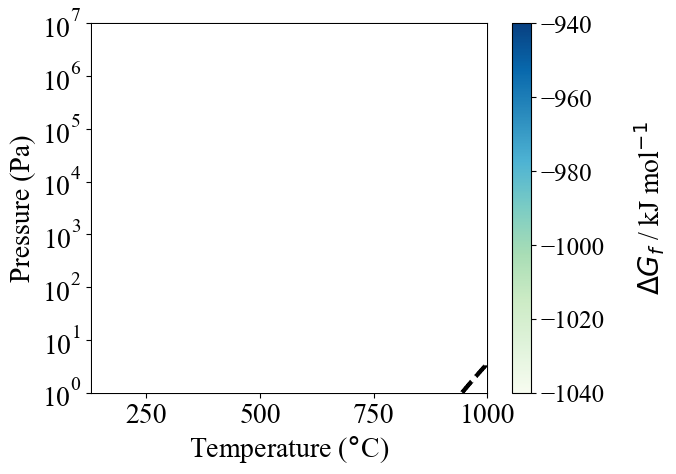

In [7]:
S8_reaction = reactions.Reaction({Ba:8,Zr:8,S8:3},{BaZrS3:8},temperature=T,pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='hse06')
GFE.plot_TvsP(scale_range=[-1040, -940],T_units="C")
x1 = [130,1000] 
y1 = [9500000, 9500000]
y2 = [0.001, 0.001]
plt.fill_between(x1,y1,y2,facecolor="w",alpha=1,zorder=4,linewidth=0,edgecolor="0.8")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5],colors='k',linewidths=3,linestyles='dashed',zorder=25)
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.xticks([250,500,750,1000])
plt.xlim([127,1000])
plt.savefig('Sdivision_hse06.png',bbox_inches='tight')

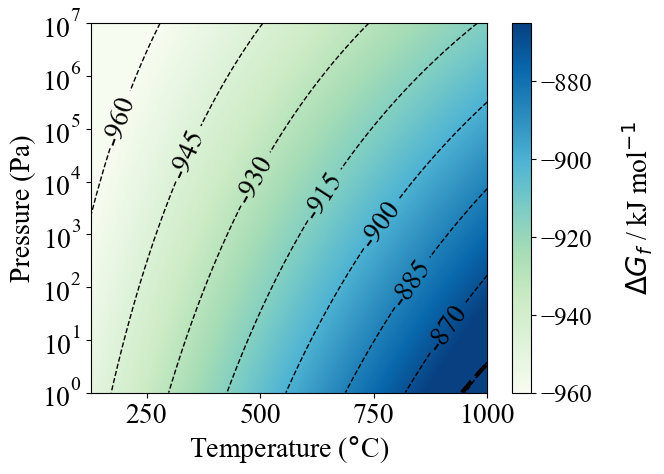

In [9]:
S8_reaction = reactions.Reaction({Ba:8,Zr:8,S8:3},{BaZrS3:8},temperature=T,pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='hse06')
GFE.plot_TvsP(scale_range=[-960, -865],T_units="C")
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5],colors='k',linewidths=3,linestyles='dashed')
plt.savefig('S8_hse06.png',bbox_inches='tight')
#plt.fill_between([720,1000],[1,1],800,facecolor="w",zorder=30)

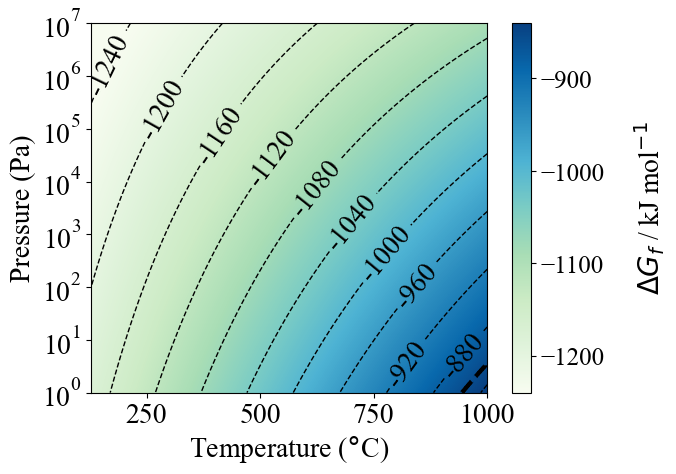

In [8]:
S2_reaction = reactions.Reaction({Ba:2,Zr:2,S2:3},{BaZrS3:2},temperature=T,pressure=P,fu=2)
GFE = S2_reaction.Dmu(units="kJ",xc='hse06')
GFE.plot_TvsP(scale_range=[-1240, -840],T_units="C")
#plt.xlim(117,1217)
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5],colors='k',linewidths=3,linestyles='dashed')
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.savefig('S2_hse06.png',bbox_inches='tight')

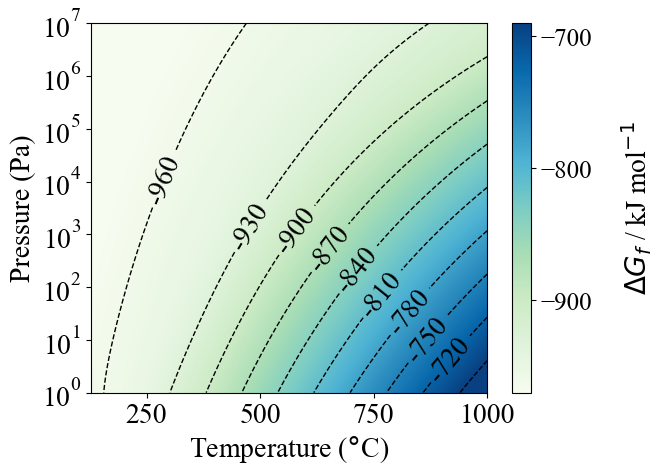

In [8]:
Sg_reaction = reactions.Reaction({Ba:1,Zr:1,S_g:3},{BaZrS3:1},temperature=T,pressure=P)
GFE = Sg_reaction.Dmu(units="kJ",xc='hse06')
GFE.plot_TvsP(scale_range=[-970, -690],T_units="C")
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.savefig('Smix_hse06.png',bbox_inches='tight')

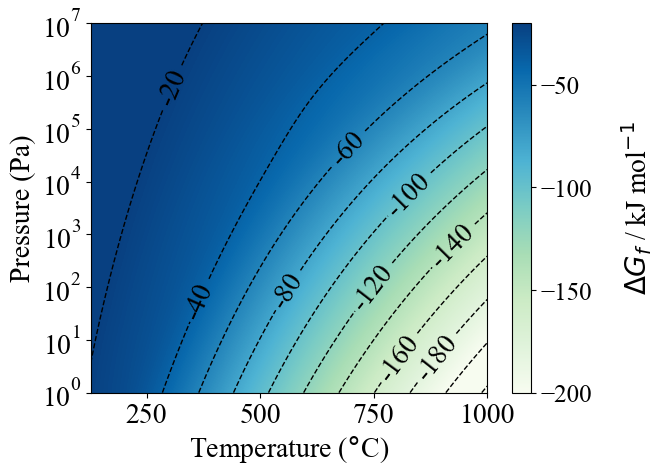

In [6]:
bulk_reaction = reactions.Reaction({BaS2:8, ZrS3_P2:8},{BaZrS3:8, S_g:16},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="hse06")
GFE.plot_TvsP(scale_range=[-200,-20],T_units="C")
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.savefig('BaS2-ZrS3--BZS-Sg_hse06.png',bbox_inches='tight')

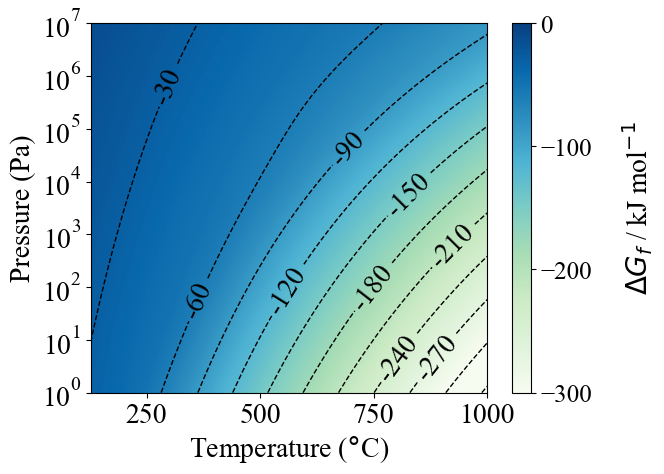

In [7]:
bulk_reaction = reactions.Reaction({BaS3_P4:2,ZrS3_P2:2},{BaZrS3:2,S_g:6},temperature=T, pressure=P, fu=2)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='hse06')
plt = GFE_4310.plot_TvsP(scale_range=[-300,0],T_units="C")
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.savefig('BaS3-ZrS3--BZS-Sg_hse06.png',bbox_inches='tight')